In [1]:
3 !pip install -q google-play-scraper


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import seaborn as sns

from google_play_scraper import reviews
from google_play_scraper import Sort

In [2]:
## top social and communications apps 
apps = {
    "Facebook": "com.facebook.katana",
    "WhatsApp": "com.whatsapp",
    "Facebook Messenger": "com.facebook.orca",
    "Instagram": "com.instagram.android",
    "TikTok": "com.zhiliaoapp.musically",
    "Facebook Lite": "com.facebook.lite",
    "Snapchat": "com.snapchat.android",
    "Twitter": "com.twitter.android",
    "Flipboard": "flipboard.app",
    "Skype": "com.skype.raider",
    "Viber": "com.viber.voip",
    "LINE" : "jp.naver.line.android"
   
}

SORT = Sort.NEWEST
N_REVIEWS = 30000
reviews_dict =  {k : {} for k in apps}

In [3]:
## Scraping reviews
for app in apps.keys():
    reviews_dict[app], _  = reviews(
         apps[app],
         lang='en',
         country='us',
         sort= SORT,
         count=N_REVIEWS, 
         filter_score_with=None
     )
    assert len(reviews_dict[app]) == N_REVIEWS

In [4]:
## saving reviews
df = pd.DataFrame()
for app in apps.keys():
    SAVE_DIR = "data" + app  + ".csv"
    temp_df = pd.DataFrame(
        reviews_dict[app],
        columns = ["reviewId", "content", "score"]
                          )
    temp_df.to_csv(SAVE_DIR, index = False)
    temp_df["app"] = app
    df = pd.concat((df ,temp_df))
df.to_csv("../data/all_combined.csv", index = False)
print("DONE :) ")
df.head()

DONE :) 


,reviewId,content,score,app
0,cc9d48ea-32a2-49d5-bca5-d5977e255b15,Osm,5,Facebook
1,1dbb126d-d8c3-420d-8067-2fb9d495215f,This app lock my fb account again and again,5,Facebook
2,e6f0554b-247f-4f0b-924b-c4eac142605f,Fine to view by all according to their thinkin...,1,Facebook
3,0b65ad98-bd72-4f2b-b21a-a570c6ea2956,Off⁸4peo,1,Facebook
4,fb4ac6cd-0829-419b-930d-cd147a5c5304,Good,5,Facebook


In [5]:
df.shape

(360000, 4)

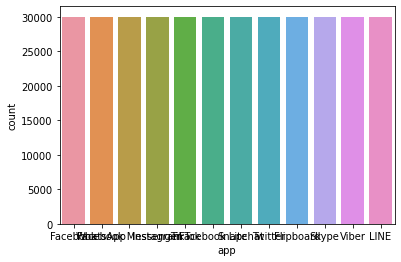

In [6]:
sns.countplot(x = 'app', data=df);